# Projet numérique: Equations Différentielles

In [4]:
import autograd
import autograd.numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

from IPython.display import display

#### Question 1
Donner une interprétation physique à chaque terme de la dynamique. Montrer qu’il existe deux points d’équilibre (0,0) et $\bar{x}\in\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. Que peut-on dire de leur stabilité à ce stade ?

*Réponse:* Pour la 1ère équation: le nombre de proies au cours du temps évolue ainsi: elles se reproduisent, donc leur nombre augmente avec le temps, proportionnellement à leur population; mais une partie de ces proies est éliminée par un partie des prédateurs, d'où le terme $\beta x_1 x_2$, qui modélise une probabilité de rencontre entre une proie et un prédateur.
$\newline$Pour la 2nde équation: un prédateur, en l'absence de sa proie, ne peut survivre: une partie d'entre eux qui n'a pas pu se nourrir des proies disparaît, d'où le terme $-\gamma x_2$. Le reste des prédateurs, qui a pu se nourrir de ses proies, peut survivre et se reproduire: le nombre de prédateurs augmente donc proportionnellement au nombre de proies et de prédateurs, d'un facteur $\delta x_1$.

Un point d'équilibre du couple d'équations vérifie $(\dot{x_1},\dot{x_2})= (0,0)$. Seuls les points (0,0) et $\bar{x}=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ vérifient cette condition.

De plus: la fonction $f: x:=(x_1,x_2) \in \mathbb{R}^2 \mapsto (\dot{x_1},\dot{x_2})$ est continûment différentiable, et sa matrice jacobienne est égale à $J_{f}((x_1,x_2))=\begin{pmatrix}\alpha-\beta x_2 &-\beta x_1\\ \delta x_2&\delta x_1 -\gamma\\ \end{pmatrix}$

En (0,0), elle vaut $J_{f}((0,0))=\begin{pmatrix}\alpha &0\\ 0&\ -\gamma\\ \end{pmatrix}$. Ses valeurs propres sont $\alpha$ et $-\gamma$, or $\alpha >0$ donc d'après le lien entre stabilité et stabilité du linéarisé tangent, **(0,0) est un point d'équilibre instable du système.**

En $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$, elle vaut $J_{f}((\frac{\gamma}{\delta},\frac{\alpha}{\beta}))=\begin{pmatrix}0 &\frac{-\gamma\beta}{\delta}\\ \frac{\alpha\delta}{\beta}&0\\ \end{pmatrix}$. Ses valeurs propres sont imaginaires purs, on ne peut pas utiliser le même critère qu'avec le point (0,0) pour déterminer la stabilité ou non de ce point. Il faut réaliser une analyse plus approfondie pour déterminer sa stabilité ou non. 

#### Question 2
A l’aide des fonctions meshgrid et quiver, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser streamplot pour visualiser le portrait de phase.

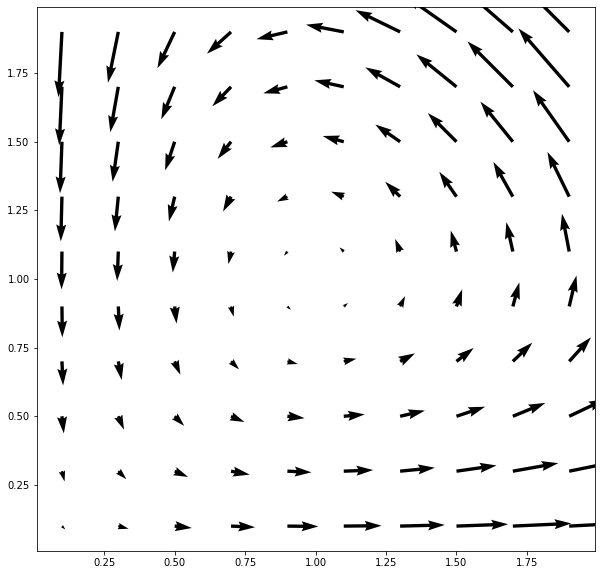

In [5]:
alpha, beta, gamma, delta = 1, 1, 1, 1
x1 = np.arange(0.1,2,0.2)
x2 = np.arange(0.1,2,0.2)
X1, X2 = np.meshgrid(x1,x2)
Y1 = X1 * (alpha - beta * X2)
Y2 = -X2 * (gamma - delta * X1)

fig, ax = plt.subplots()
q = ax.quiver(X1, X2, Y1, Y2)
plt.show()

Les solutions suivent les flèches tracées donc tournent autour du point d'équilibre $\bar{x}$.
Cela se traduit par des oscillations dans chaque population autour de $\bar{x}$.

#### Question 3
Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ sur son ensemble de définition.

*Réponse:*

Soit $(x_1(t),x_2(t))$ une solution au problème de Lokta-Volterra initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$.
On a $(x_1(t_0),x_2(t_0))=x_0\in \mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$.
Suposons par l'absurde que il existe $t_1>0$ tel que $x_1(t_0)=0$. Notons $x_2(t_1)=x_{21}$

$\newline$La fonction $f:(x_1,x_2)\mapsto (x_1(\alpha -\beta x_2),-x_2(\gamma -\delta x_1))$ est continue sur  $\mathbb{R}^2$ et admet une dérivée partielle continue par rapport à $x$. De plus, $\mathbb{R}^2$ et $\mathbb{R}$ sont des ouverts. D'après le théorème de Cauchy-Lipschitz, le problème de Lokta-Volterra admet une unique solution vérifiant $x_1(t_1)=0$ et $x_2(t_1)=x_{21}$.
$\newline$On vérifie que $x_1(t)=0$ et $x_2(t)=x_{21}exp(-\gamma t)$ est cette solution. Or, elle ne vérifie pas $(x_1(t_0),x_2(t_0))=x_0$. D'où une contradiction.

$\newline$On montre de même qu'il n'existe pas $t_1>0$ et que $x_2(t_1)=0$.

$\newline$De plus, comme $x(t)$ est continue, ses applications coordonnée aussi et donc par le théorème des valeurs intermédiaires, si $x(t)$ sort de $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$, il existera $t_1$ tel que $x_1(t_1)=0$ ou $x_2(t_1)=0$, ce qui est impossible.

$\newline$Ainsi, toute solution initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ reste dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$.

#### Question 4
On considère la fonction $H(x_1,x_2) =\delta x_1−\gamma lnx_1+\beta x_2−\alpha lnx_2$ définie sur $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. Calculer la dérivée de H le long des solutions initialisées dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$ est définie sur $\mathbb{R}$.

*Réponse* Soit $x:t\mapsto x(t)=(x_1(t),x_2(t))$ une solution initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. D'après la question précédente, $x_1$ et $x_2$ restent strictement positives pour tout t dans le domaine de définition de $x$, donc $\nabla H(x(t))=(\delta-\frac{\gamma}{x_1},\beta -\frac{\alpha}{x_2})$ est bien défini pour tout t dans le domaine de définition de $x$. Ainsi, on a:$\newline\newline\frac{dH(x(t)}{dt}=\langle\nabla H(x(t))|(\dot{x_1}(t),\dot{x_2}(t))\rangle\newline\newline =(\delta-\frac{\gamma}{x_1})x_1(\alpha-\beta x_2)+(\beta -\frac{\alpha}{x_2})x_2(\delta x_1 - \gamma)\newline\newline =(\delta\alpha x_1-\gamma\alpha x_2 -\delta\beta x_1x_2 +\gamma\beta x_2)+(\beta\delta x_1x_2 - \beta\gamma x_2 - \alpha\delta x_1 + \alpha\gamma x_2)\newline\newline =0\newline\newline$ H est donc constant le long des solutions initialisées dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$, et ainsi H est borné le long de ces solutions. Soit $x$ une solution maximale initialisée dans $\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. Supposons, par l'absurde, que $x$ est définie sur un intervalle dont l'une des bornes au moins est finie. On aurait alors, d'après le théorème sur le domaine maximal d'existence: $\newline\newline$ - Soit $(t,x(t))$ tend, quand t tend vers cette borne finie, vers la frontière de $\mathbb{R}$x($\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$), et donc les coordonnées de $x$ divergent ou tendent vers 0. Dans le 1er cas cela fait diverger H par croissances comparées, ce qui est impossible puisque H est borné. Dans le 2nd cas cela fait également diverger H via les termes en ln. Donc c'est impossible. $\newline\newline$ - Soit $\|x(t)\|$ tend vers +$\infty$ quand t tend vers la borne finie, ce qui ferait également diverger H et serait donc également impossible.
Finalement, le domaine de définition de $x$ n'est pas borné, d'où: $\newline$ **$x$ est définie sur $\mathbb{R}$**.



#### Question 5
Représenter les courbes de niveau de H. Où se trouve ̄$\bar{x}$? Qu’en conclut-on sur le comportement des solutions? En déduire (graphiquement) que ̄$\bar{x}$ est stable, au sens de la définition de stabilité.

TypeError: float() argument must be a string or a number, not 'QuadContourSet'

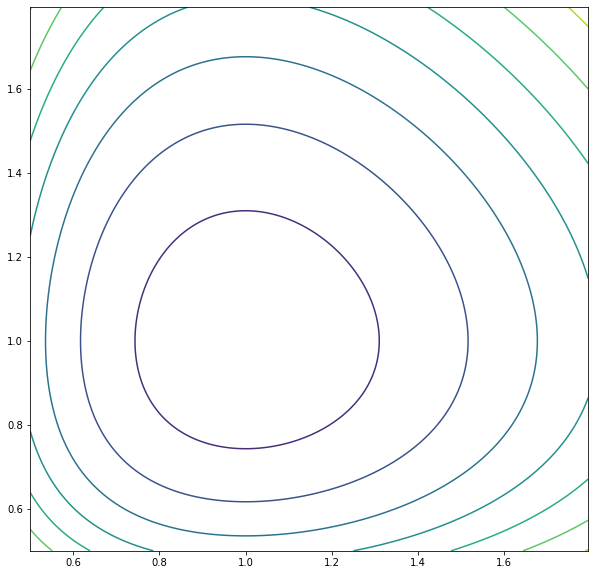

In [6]:
alpha, beta, gamma, delta = 1, 1, 1, 1
x1 = np.arange(0.5,1.8,0.005)
x2 = np.arange(0.5,1.8,0.005)
X1, X2 = np.meshgrid(x1,x2)
H = delta*X1 - gamma*np.log(X1) + beta*X2 - alpha*np.log(X2)
c = plt.contour(X1, X2, H)
plt.plot(c)

Les solutions restent sur les courbes de niveau de H et tournent donc bien autour de $\bar{x}$.

$\newline$On observe que les courbes de niveau de $H$ entourent le point $\bar{x}$ et sont inscrites les une dans les autres.
Ainsi, en prenant $\epsilon>0$, il existera une courbe de niveau $C$ de $H$ restant à moins de $\epsilon$ de $\bar{x}$.
En posant $\eta=\epsilon$, si $\|(x1_0, x2_0)-\bar{x}\|<\epsilon$, $(x1_0, x2_0)$ sera sur une courbe de niveau $D$ de $H$ intérieure à $C$. 
Comme le long de la solution, $H'(t)=0$, la solution restera sur $D$, qui est intérieure à $C$ donc qui reste à moins de $\epsilon$ de $\bar{x}$. 
$\newline$ Le point $\bar{x}$ est donc stable.

#### Question 6
Coder une fonction du type $\newline$def solve_euler_explicit(f, x0, dt, t0, tf):$\newline$...$\newline$return t,$\newline$ xprenant en entrée une fonction $f:\mathbb{R}x\mathbb{R}^n \mapsto\mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps dt, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$du schéma d’Euler explicite appliqué à ̇$\dot{x}$=f(t,x). La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque dt tend vers 0. Comment visualiser graphiquement l’ordre de convergence ?

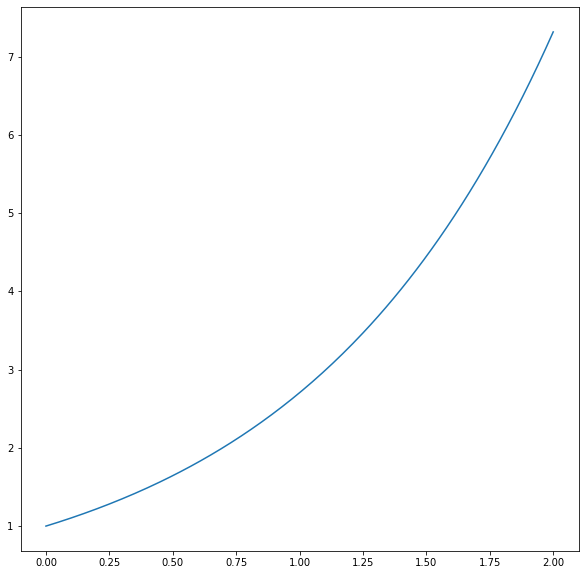

In [7]:
def solve_euler_explicit(f,x0,dt,t0,tf):
    h=int((tf-t0)/dt)
    x=x0
    t = t0 + np.arange(h+1)*dt
    A=[]
    A.append(x0)
    for k in range(1,h+1):
        x=x+dt*f(t0+k*dt,x)
        A.append(x)
    B=np.array(A)
    return t,B

def f1(t,x):
    return x
t,x=solve_euler_explicit(f1,1,0.01,0,2)
plt.plot(t,x)



Le schéma converge bien vers l'exponentielle, qui est la solution exacte au problème. 

Pour visualiser l'ordre de convergence, on peut tracer l'erreur pour une étape en fonction du pas dt. On observe ici que l'ordre est de 1, l'erreur étant de l'ordre de $dt^2$.

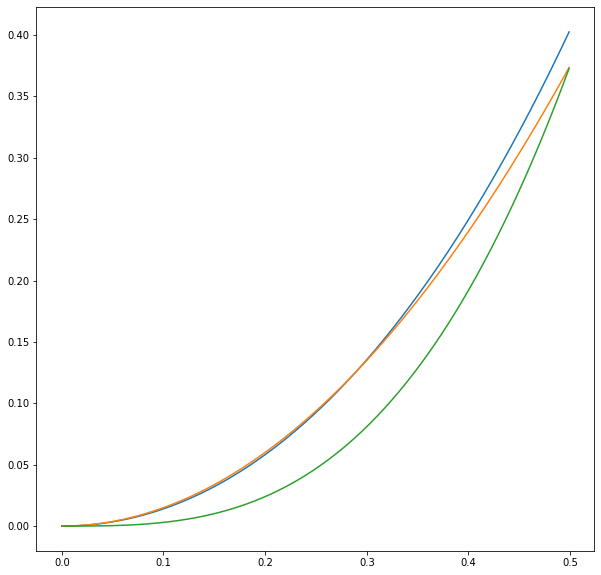

In [8]:
def test_erreur_exp(x_0, dt):
    return abs(np.exp(x_0)+dt*np.exp(x_0)-np.exp(x_0+dt))

test = np.vectorize(test_erreur_exp)

dt = np.arange(0,0.5,0.001)
x_0 = [1 for i in range(len(dt))]
err = test(x_0, dt)

plt.plot(dt,err) #bleu

plt.plot(dt, 1.5*dt**2) #orange

plt.plot(dt, 3*dt**3) #vert

#### Question 7
Utiliser le schéma d’Euler explicite pour simuler les équations de Lotka-Volterra. Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l’évolution de la fonction H.

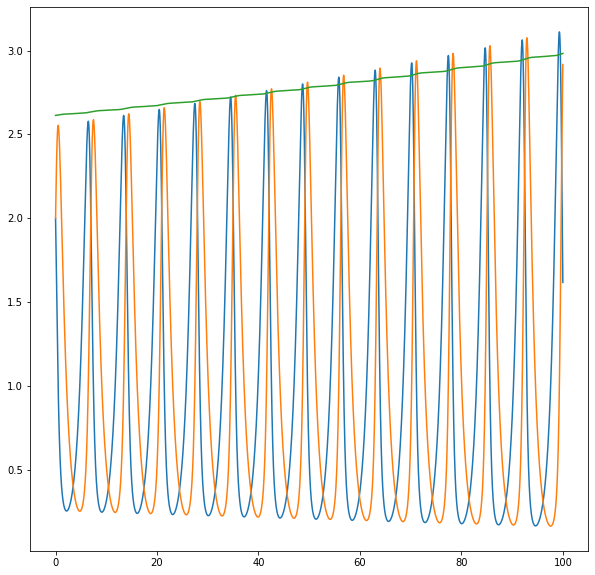

In [9]:
def f2(t,x):
    x1=x[0]*(alpha-beta*x[1])
    x2=x[1]*(delta*x[0]-gamma)
    return np.array([x1,x2])

t,x=solve_euler_explicit(f2,[2,2],0.005,0,100)
plt.plot(t,x)

def h(y):
    return delta*y[0] - gamma*np.log(y[0]) + beta*y[1] - alpha*np.log(y[1])

H = [h(y) for y in x]
plt.plot(t,H)

On observe que H n'est pas constant au cours de l'évolution, il tend vers l'infini au temps long, cela n'est pas fidèle à la réalité (cf question 4) et donc non satisfaisant. Cela se traduit par des courbes de population avec des oscillations toujours plus grandes, contrairement à des oscillations d'amplitude constante attendues.

#### Question 8
Coder maintenant une fonction du type $\newline$def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):$\newline$...$\newline$return t,$\newline$ x donnant la solution d’un schéma d’Euler implicite appliqué à ̇$\dot{x}$=f(t,x)selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?

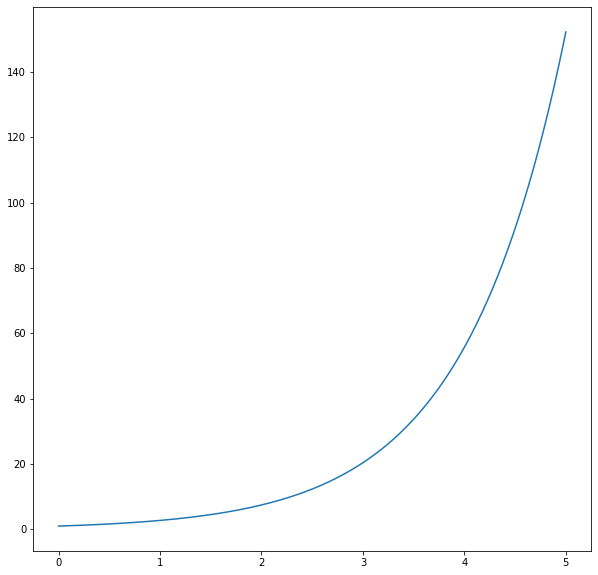

In [11]:
def solve_euler_implicit(f, x0, dt, t0, itermax = 100):
    
    def point_fixe(F, x_0, eps):
        x = x_0
        x_next = x + 2*eps*x
        while np.all(abs(x_next-x)/x_0 > eps):
            x_next, x = F(x_next), x_next
        return x_next
    
    
    t = t0 + np.arange(itermax+1)*dt
    x = [x0]
    for n in range(itermax):
        def F(u):
            return x[n] + dt*f(t[n]+dt, u)
        x.append(point_fixe(F, x[n]+dt*f(t[n],x[n]),0.001))
    return t, x

def f(t, x): #la solution sera l'exponentielle
    return x

t, x = solve_euler_implicit(f, 1, 0.01, 0, 500)

plt.plot(t,x)

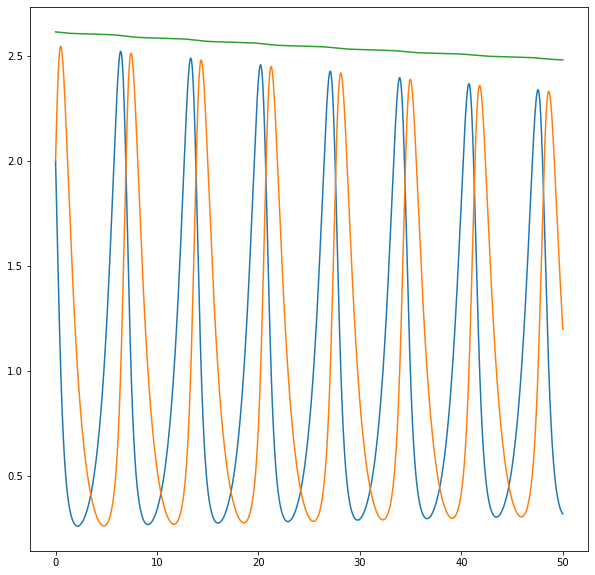

In [12]:
def lokta_volterra(t, array):
    return np.array([array[0]*(alpha - beta*array[1]), -array[1]*(gamma - delta*array[0])])

t, liste = solve_euler_implicit(lokta_volterra, np.array([2,2]), 0.005, 0, 10000)
x1 = [i[0] for i in liste]
x2 = [i[1] for i in liste]
plt.plot(t,x1)
plt.plot(t,x2)

H = H = delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)
plt.plot(t,H)

Cette fois, H décroit mais semble déjà plus stable qu'avec la méthode d'Euler explicite. Le résultat n'est toujours pas satisfaisant.

#### Question 9
Expliquer pourquoi les solutions de ̇$\newline\dot{x_1}=x_1(\alpha−\beta x_2)−u_1(x_1,x_2)(H(x_1,x_2)−H_0) ̇\newline\dot{x_2}=−x_2(\gamma−\delta x_1)−u_2(x_1,x_2)(H(x_1,x_2)−H_0)$sont identiques à celles de Lotka-Volterra si $H_0=H(x(0))$ pour tout choix de $u:\mathbb{R}^2→\mathbb{R}^2$ continûment différentiable.

*Réponse:*

Premièrement, une solution $x(t)$ du système de Lokta-Volterra est solutions de ce système. En effet, pour ces solutions, $H(x1,x2)$ est constant donc égal à $H_0$ et le système se simplifie en celui de Lokta-Volterra donc $x(t)$ est solution.

Soit $(t0, x0)\in\mathbb{R}$x$\mathbb{R}^2 $ .La fonction $f:\mathbb{R}$x$\mathbb{R}^2 \to \mathbb{R}^2$ définie par: $f(t, x1, x2) = (x_1(\alpha−\beta x_2)−u_1(x_1,x_2)(H(x_1,x_2)−H_0), −x_2(\gamma−\delta x_1)−u_2(x_1,x_2)(H(x_1,x_2)−H_0)$ admet une dérivée partielle continue par rapport à $(x1, x2)$ (car $u$ est continûment différentiable) et $\mathbb{R}^2$ est un ouvert de $\mathbb{R}^2$. D'après le théorème de Cauchy-Lipschitz, ce système admet une unique solution avec la condition initiale $(t0, x0)$. Comme la solution de Lokta-Volterra avec la même condition initiale est solution du système considéré, elle est égale à l'unique solution du dit système.

Ainsi, les solutions du système considéré sont identiques à celles de Lokta-Volterra.

#### Question 10
Soit $H_0\in\mathbb{R}$. Calculer la dérivée de $H−H_0$ le long des solutions de ce nouveau système. Montrer que l’on peut choisir u tel que $\frac{d(H(x(t))−H_0)}{dt} =−k\|\nabla H(x(t))\|^2 (H(x(t))−H_0)$.En déduire qu’alors H(x(t))converge exponentiellement vers $H_0$ lorsque t tend vers l’infini si x reste à une distance strictement positive de ̄$\bar{x}$.

*Réponse:* 
$\frac{d(H(x_1(t),x_2(t))-H_0)}{dt}=\langle\nabla (H(x_1(t),x_2(t))-H_0)|(\dot{x_1}(t),\dot{x_2}(t))\rangle\newline$ Or, d'après la question 4, $\nabla(H(x_1(t),x_2(t))-H_0)$ est bien défini et vaut $(\delta -\frac{\gamma}{x_1(t)},\beta-\frac{\alpha}{x_2(t)})$. Cette fois-ci, $(\dot{x_1}(t),\dot{x_2}(t))$ vaut $(\dot{x_1}(t)=x_1(t)(\alpha−\beta x_2(t))−u_1(x_1(t),x_2(t))(H(x_1(t),x_2(t))−H_0),\dot{x_2}(t)=−x_2(t)(\gamma−\delta x_1(t))−u_2(x_1(t),x_2(t))(H(x_1(t),x_2(t))−H_0)).\newline\newline$ On a donc: $\newline\frac{d(H(x_1,x_2)-H_0)}{dt}=(\delta -\frac{\gamma}{x_1})(x_1(\alpha−\beta x_2)−u_1(x_1,x_2)(H(x_1,x_2)−H_0))+(\beta-\frac{\alpha}{x_2})(−x_2(\gamma−\delta x_1)−u_2(x_1,x_2)(H(x_1,x_2)−H_0))\newline\newline =-(H(x_1(t),x_2(t))−H_0)((\delta-\frac{\gamma}{x_1})u_1(x_1,x_2)+(\beta-\frac{\alpha}{x_2})u_2(x_1,x_2)\newline\newline =-(H(x_1,x_2)−H_0)\langle\nabla H(x_1,x_2)|(u_1(x_1,x_2),u_2(x_1,x_2))\rangle$


D'après la question 3, comme $(x1(t), x2(t))$ reste dans $\bar{x}\in\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$, on peut ne définir u que sur $\bar{x}\in\mathbb{R}_{+}^{*}$x$\mathbb{R}_{+}^{*}$. On peut alors poser $u= k\nabla H$, on a alors $\frac{d(H(x(t))−H_0)}{dt} =−k\|\nabla H(x(t))\|^2 (H(x(t))−H_0)$.


D'après l'expression de $\nabla H$ obtenue plus haut, comme $x$ reste à une distance strictement positive de $\bar{x}$, $\|\nabla H\|$ reste supérieure à $c>0$. En effet, si $\|x-\bar{x}\|_{\infty}>\epsilon$, alors $\|x_1-\bar{x_1}\|>\epsilon$ ou $\|x_2-\bar{x_2}\|>\epsilon$. Supposons sans perdre de généralité que $\|x_1-\bar{x_1}\|>\epsilon$. Alors d'après les variations de $x\mapsto \delta -\frac{\gamma}{x}$,  $\|\delta -\frac{\gamma}{x_1}\|>min(\|\delta -\frac{\gamma}{\bar{x_1}-\epsilon}\|;\|\delta -\frac{\gamma}{\bar{x_1}+\epsilon}\|)>0$, d'où $\|\nabla H\|>min(\|\delta -\frac{\gamma}{\bar{x_1}-\epsilon}\|;\|\delta -\frac{\gamma}{\bar{x_1}+\epsilon}\|).$

$\newline$On a alors $\frac{d(H(x(t))−H_0)}{dt} \leq−kc^2 (H(x(t))−H_0)$

Donc $\frac{d(H(x(t))−H_0)}{dt}exp(kc^2t) \leq−kc^2 (H(x(t))−H_0)exp(kc^2t)$,$\newline$ soit $\frac{d}{dt}((H(x(t))-H_0)exp(kc^2t))\leq 0$.
$\newline$Ainsi, il existe $A\in\mathbb{R}$ tel que $\forall t>0, (H(x(t))-H_0)exp(kc^2t)\leq A$ et donc $H(x(t))-H_0\leq Aexp(-kc^2t)$.

#### Question 11
En déduire comment modifier l’implémentation du schéma d’Euler pourassurer la stabilité de H. Quel est le rôle de k? Peut-il être choisi arbitrairement grand? Pourquoi? On pourra exprimer $H(x_{j+1})−H(x_0)$ en fonction de $H(x_j)−H(x_0)$ au premier ordre en dt.

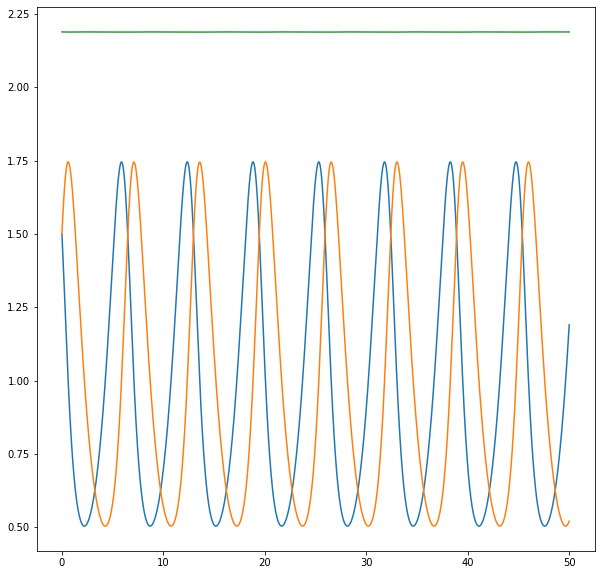

In [8]:
k = 10

def u1(array):
    return k*(gamma - delta/array[0])

def u2(array):
    return k*(beta - alpha/array[1])

def H(array):
    return delta*array[0] - gamma*np.log(array[0]) + beta*array[1] - alpha*np.log(array[1])

def lokta_volterra_bis(t, array):
    return np.array([array[0]*(alpha - beta*array[1]) - u1(array)*(H(array)-H([1.5,1.5])), -array[1]*(gamma - delta*array[0]) - u2(array)*(H(array)-H([1.5,1.5]))])

t, liste = solve_euler_implicit(lokta_volterra_bis, np.array([1.5,1.5]), 0.005, 0, 10000)
x1 = [i[0] for i in liste]
x2 = [i[1] for i in liste]
plt.plot(t,x1)
plt.plot(t,x2)

H = H = delta*x1 - gamma*np.log(x1) + beta*x2 - alpha*np.log(x2)
plt.plot(t,H)


$k$ détermine à quelle vitesse $H(x(t))-H_0$ converge vers 0.

$\newline$A l'ordre 1 en dt, $H(x(j+1))-H_0=H(x_j)-H_0 + \frac{dH}{dt}dt=H(x_j)-H_0-k\|\nabla H(x(t))\|^2 (H(x(t))−H_0)dt$
$\newline H(x(j+1))-H_0=(1-k\|\nabla H(x(t))\|dt)(H(x_j)-H_0)$
Ainsi, si $k>\frac{2}{\nabla H(x(t))\|dt}$, alors $\|H(x_{j+1})-H_0\|>\|H(x_j)-H_0\|$, et donc l'erreur sur $H$ augmente. $\newline$On ne peut peut donc pas choisir k arbitrairement grand en pratique.